# **Author : Aniket Anil Dhakate**

# **Task 1 : Prediction using Supervised Machine Learning**

**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**

**Importing Libraries**

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize']=[8,5]

print('All Libraries has been imported Sucessfully')

All Libraries has been imported Sucessfully


**Roadmap**


* Univariate Analysis
* Bivariate Analysis - Here we try to find the pattern with the TGT.
* Missing Values
* Outliers Identification
* Feature Engineering.
* Scaling/transformation


**Model Building**
* Base Model - You must have your base model.In Classification, the base model is the 0s and in Regression,its average.

* Logistic Regression Model followed by Tree Based Models

Note- All the model are submitted using KFold Cross Validation Approach.

* Paramter Tunning Should be done for top 3 models only.Once that is done we will build the stacking model(Ensemble model).

Exceptions: LightGBM,Catboost,ExTreesClassifier......
(This model are based on Categorical Data)

**Reading Data From Source**

In [8]:
df=pd.read_csv('data.csv')
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
#Check The shape of the data

df.shape

# Data has 25 records and 2 variable

(25, 2)

In [17]:
#Check the info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
#Check the null Values

df.isnull().sum()

#There are not any null values in the data

Hours     0
Scores    0
dtype: int64

In [20]:
# check the description of student_score data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Univariate Analysis**

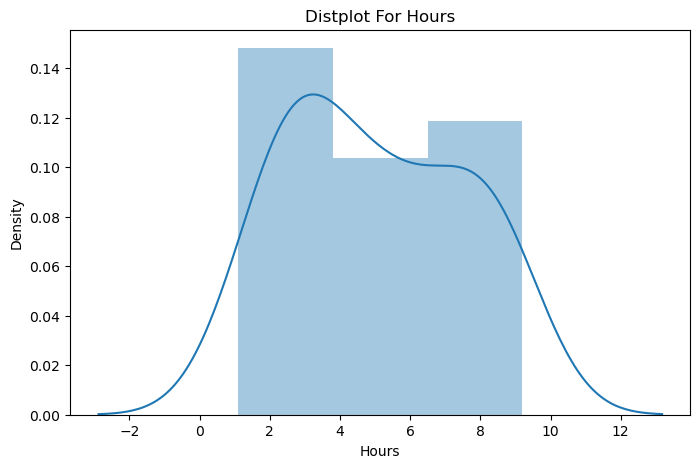

In [25]:
#Distplot for Hours

sns.distplot(df.Hours)
plt.title('Distplot For Hours')
plt.show()

#Hours are slightly right Skewed

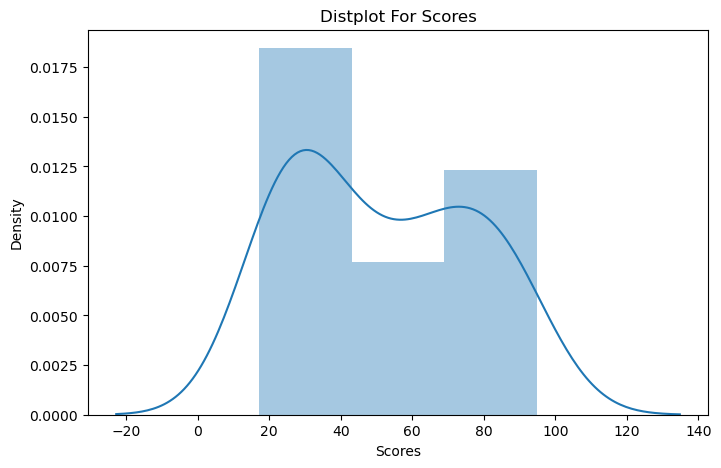

In [26]:
#Distplot for Scores

sns.distplot(df.Scores)
plt.title('Distplot For Scores')
plt.show()

### Bivariate Analysis

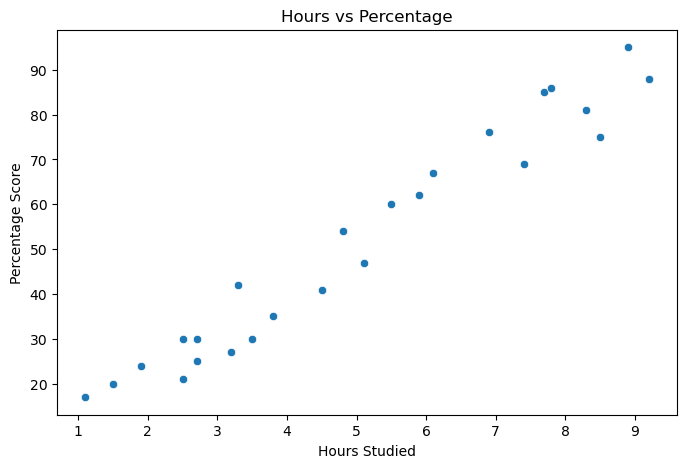

In [30]:
sns.scatterplot(x=df['Hours'],y=df['Scores'],)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**As we can see above there is a positive linear relation between the number of Hours Studied and percentage of Scores.**

### Analysis the Data Using Different Graphs

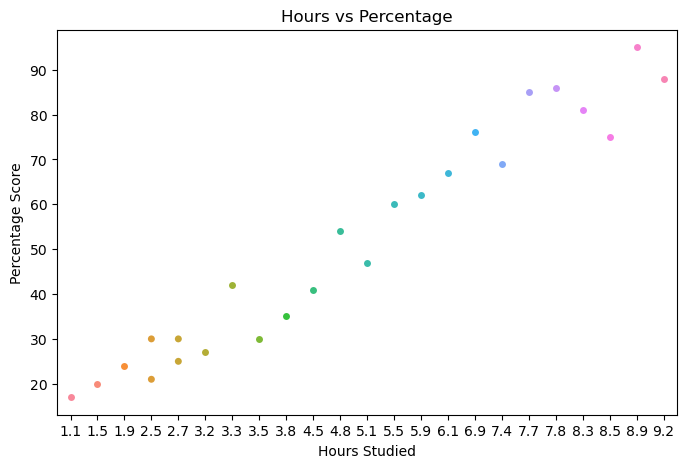

In [31]:
sns.swarmplot(x=df['Hours'],y=df['Scores'],)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

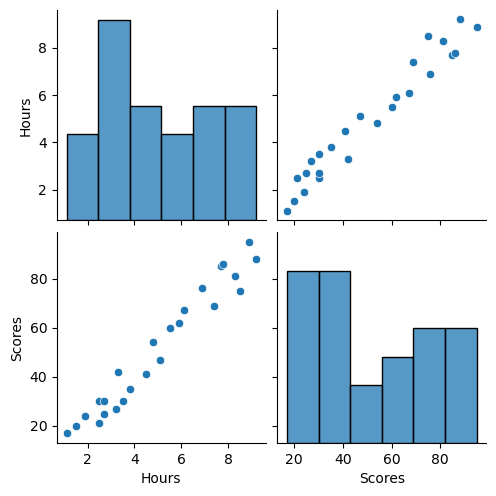

In [35]:
sns.pairplot(df)
plt.show()

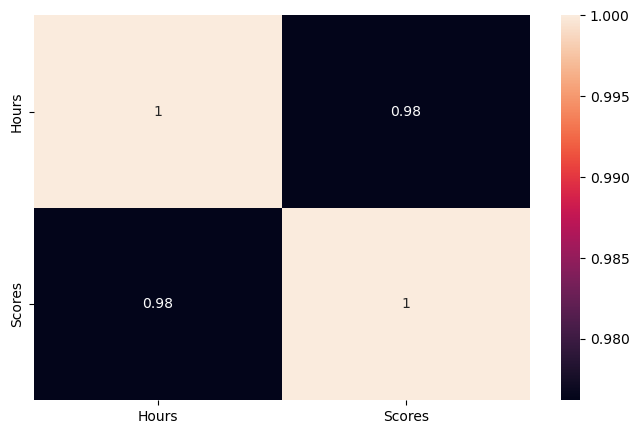

In [37]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**Statistical test**

In [42]:
import scipy.stats as stats

#Ho : The Data is Normal.
#Ha : The Data is not Normal.

for i in df:
    print('Pvalue for',i,'is',stats.jarque_bera(df.loc[:,i]))
    
#since the pvalue>0.05,We fail to reject the Ho meaning data is normal.

Pvalue for Hours is Jarque_beraResult(statistic=1.8580336151250898, pvalue=0.3949418233594212)
Pvalue for Scores is Jarque_beraResult(statistic=2.247338169134961, pvalue=0.32508483999924964)


# num vs num - T-Test Ind




**Ho: There is no relation between Hours and Scores**

**Ha: There is relation between Hours and Scores**

In [45]:
from scipy.stats import ttest_ind

ttest_ind(df['Hours'],df['Scores'])

Ttest_indResult(statistic=-9.142690841077545, pvalue=4.377952611625229e-12)

**Since the p_value < 0.05, so we reject the Null Hypothesis,Hence there is a relationship between Hours and scores**

# Model Building

In [66]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from statsmodels.api import OLS,add_constant


In [77]:
#split the data in train and test

from sklearn.model_selection import train_test_split

X=df.drop('Scores',axis=1)
y=df['Scores']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((17, 1), (8, 1), (17,), (8,))

In [78]:
#Linear Regression - Statistical Model

temp_xtrain=add_constant(xtrain)
temp_xtest=add_constant(xtest)

model=OLS(ytrain,temp_xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.15e-11
Time:                        13:37:36   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking scores for training and test set

In [79]:
prediction_tr=model.predict(temp_xtrain)
prediction_test=model.predict(temp_xtest)

rmse_xtrain=np.sqrt(mean_squared_error(ytrain,prediction_tr))
rmse_xtest=np.sqrt(mean_squared_error(ytest,prediction_test))

print('RMSE Train',rmse_xtrain)
print('RMSE Test',rmse_xtest)


#MAE
mae=mean_absolute_error(ytest,prediction_test)
print('MAE',mae)

#RMSE of 5 is telling us that the model prediction is deviation by 5 Hours

RMSE Train 5.55451986094803
RMSE Test 5.067387845160845
MAE 4.762517892332275


# Linear Model

In [153]:
from sklearn.linear_model import LinearRegression


lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

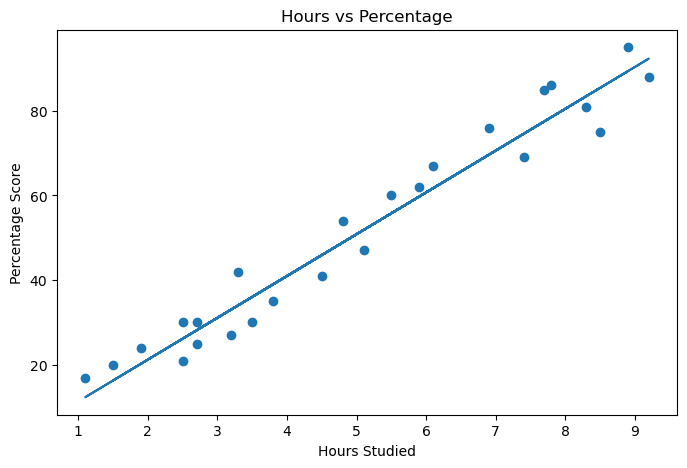

In [88]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_
# Test Data
plt.scatter(X, y)
plt.plot(X, line)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [94]:
print('Test Score',lr.score(xtest,ytest))
print('Training Score',lr.score(xtrain,ytrain))

Test Score 0.9309458862687437
Training Score 0.9570735354094693


In [146]:
y_pred=lr.predict(xtest)
y_pred

array([28.14877107, 39.00765694, 34.07179972, 59.73825724, 16.30271375,
       74.54582888, 69.60997167, 48.87937137])

# Comparing Actual result to the Predicted Model result

In [147]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred}) 
df 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [151]:
#Predict The Score for 9.25 Hours
print('Number Of Hours = 9.25')
print('Students Who Study 9.25 hrs/day is',lr.predict([[9.25]]))

Number Of Hours = 9.25
Students Who Study 9.25 hrs/day is [92.80850057]


# Evaluating the model

In [152]:
print('Mean Absolute Error:',mean_absolute_error(ytest, y_pred)) 
print('Mean Squared Error:', mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, y_pred)))
print('R-2:',r2_score(ytest, y_pred))

Mean Absolute Error: 4.762517892332275
Mean Squared Error: 25.678419573283865
Root Mean Squared Error: 5.0673878451608445
R-2: 0.9309458862687437


R-2 gives the score of model fit and in this case we have R-2 = 0.9309458862687437 which is actually a great score for this model.

# E N D